## 2.有监督学习

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

### 2. 1线性回归

In [2]:
from sklearn.linear_model import LinearRegression
X = [[10.0], [8.0], [13.0], [9.0], [11.0], [14.0],
 [6.0], [4.0], [12.0], [7.0], [5.0]]
y = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96,
 7.24, 4.26, 10.84, 4.82, 5.68]
model = LinearRegression()
model.fit(X, y)
print(model.intercept_) # 截距
print(model.coef_) # 斜率
y_pred = model.predict([[0], [1]])
print(y_pred) # 对x=0, x=1的预测结果

3.0000909090909103
[0.50009091]
[3.00009091 3.50018182]


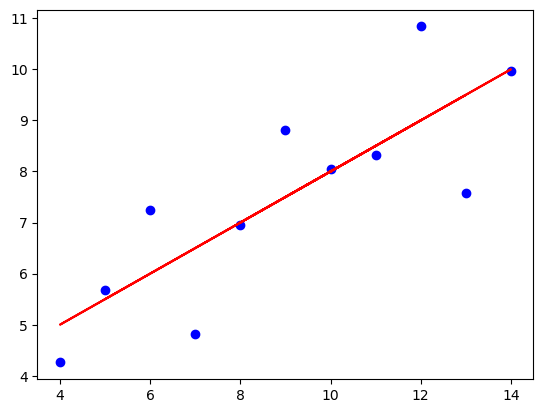

In [3]:
# 绘制数据集散点图
plt.scatter(X, y, color='blue', label='Data')
# 绘制回归线
y_pred = model.predict(X)
plt.plot(X, y_pred, color='red', label='Linear Regression Model')

![title](./image/linear.jpg)

### 2. 2正则化

正则化是防止过拟合的一种方法，与线性回归等算法配合使用。通过向损失函数增加惩罚项的
方式对模型施加制约，有望提高模型的泛化能力。

- 岭回归

岭回归误差函数<br>
![title](./image/Ridge.jpg)<br>
第一项是线性回归的损失函数；<br>
第二项被称为惩罚项(正则化项)，是学习参数的的平方和的形式；<br>
α（α ≥ 0）是控制正则化强度的参数，α 越大，对学习参数的抑制越强；α 越小，对训
练数据过拟合的可能性越大

In [4]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures #用于生成多项式特征
from sklearn.linear_model import Ridge # 实现岭回归模型
from sklearn.metrics import mean_squared_error # 用于计算均方误差
train_size = 20
test_size = 12
# 随机生成训练集和测试集
train_X = np.random.uniform(low=0, high=1.2, size=train_size)
test_X = np.random.uniform(low=0.1, high=1.3, size=test_size)
train_y = np.sin(train_X * 2 * np.pi) + np.random.normal(0, 0.2, train_size)
test_y = np.sin(test_X * 2 * np.pi) + np.random.normal(0, 0.2, test_size)
# 多项式次数为6
poly = PolynomialFeatures(6)
train_poly_X = poly.fit_transform(train_X.reshape(train_size, 1))
test_poly_X = poly.fit_transform(test_X.reshape(test_size, 1))
# 设置正则化参数为1.0
model = Ridge(alpha=1.0)
model.fit(train_poly_X, train_y)
train_pred_y = model.predict(train_poly_X)
test_pred_y = model.predict(test_poly_X)
print(mean_squared_error(train_pred_y, train_y))
print(mean_squared_error(test_pred_y, test_y))

0.20228965741795674
0.40312470749094964


Text(0, 0.5, 'y')

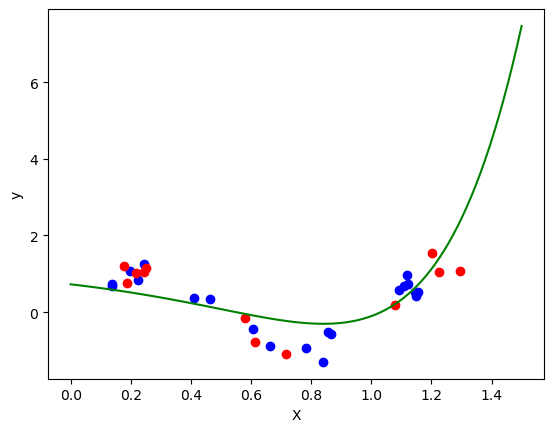

In [5]:
# 绘制拟合曲线
x_values = np.linspace(0, 1.5, 100).reshape(-1, 1)
x_poly = poly.transform(x_values)
y_values = model.predict(x_poly)

plt.scatter(train_X, train_y, color='blue', label='Train Data')
plt.scatter(test_X, test_y, color='red', label='Test Data')
plt.plot(x_values, y_values, color='green', label='Fitted Curve')
plt.xlabel('X')
plt.ylabel('y')

当改变正则化强度参数alpha时，抑制效果也会变化；<br>
当 α 增大时，可以看出学习参数被抑制，图形变得简单。相反，当 α 变小时，对学习参数的绝
对值变大的惩罚力度变缓，模型变复杂；<br>
![title](./image/alpha.jpg)

- 岭回归和Lasso回归<br>
岭回归的误差函数的惩罚项是学习参数的平方和的形式，通过将该惩罚项改为其他形式，可以实现不同特点的正则化;<br>
另一种具有代表性的正则化方法——Lasso回归；

Lasso回归误差函数<br>
![title](./image/Lasso.jpg)<br>
Lasso回归的惩罚项是学习参数的绝对值之和

### 2. 3逻辑回归

逻辑回归根据数据x和表示其所属类别的标签y进行学习，计算概率。数据x可以当作由特征值组成的向量处理。<br>
如果标签是二元分类，则可以使用前面的y=0,1这种二元数值表示。

逻辑回归的基本思想与线性回归一样，对数据x乘以权重向量w，再加上偏置w0<br>
与线性回归不同的是，为了计算概率，逻辑回归的输出范围必须限制在0和1之间。逻辑回归使用Sigmoid 函数σ(z) = 1/ [1 + exp(−z)]，返回0和1之间的数值<br>
![title](./image/Sigmod.jpg)<br>
我们对逻辑回归得到的数据进行Sigmod计算，以0.5为分界线划分概率

- 下面是一段关于计算在0℃、1℃、2℃时积雪的概率的逻辑回归代码

In [6]:
import numpy as np
from sklearn.linear_model import LogisticRegression
# 生成均值为3标准差为1的正态分布数据和均值为-1标准差为1的正态分布数据，并将它们合并为一个大小为(100,1)的二维数组
X_train = np.r_[np.random.normal(3, 1, size=50),
np.random.normal(-1, 1, size=50)].reshape((100, -1))
# 生成50个值全为1和50个值全为0的数组
y_train = np.r_[np.ones(50), np.zeros(50)]
model = LogisticRegression()
model.fit(X_train, y_train)
model.predict_proba([[0], [1], [2]])[:, 1]

array([0.05698814, 0.4264018 , 0.90142344])

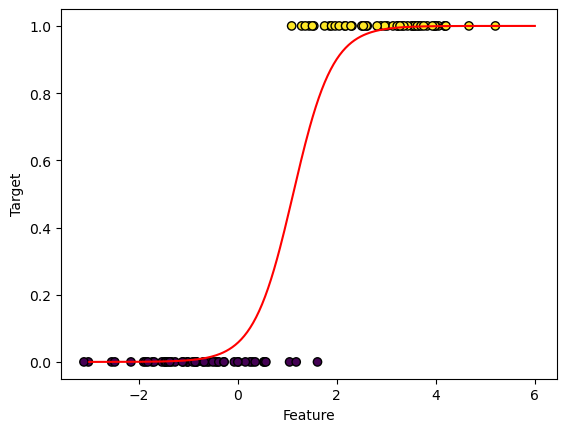

In [7]:
plt.scatter(X_train, y_train, c=y_train, cmap='viridis', edgecolors='k')
plt.xlabel('Feature')
plt.ylabel('Target')
x_values = np.linspace(-3, 6, 300).reshape(-1, 1)
y_values = model.predict_proba(x_values)[:, 1]
plt.plot(x_values, y_values, color='red', label='Logistic Regression Model')

### 2. 4支持向量机

支持向量机（Support Vector Machine，SVM）是一种应用范围非常广泛的算法，既可以用于分类，也可以用于回归。

线性支持向量机通过最大化间隔来获得更好的用于分类的决策边界<br>
训练数据中最接近决策边界的数据与决策边界之间的距离就称为间隔<br>
![title](./image/interval.jpg)

- 下面是支持向量机对随机生成的二分类数据集进行训练和评估

In [8]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs #用于生成聚类数据集
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# 生成数据，定义两个聚类中心的坐标，用于生成聚类数据集
centers = [(-1, -0.125), (0.5, 0.5)]
X, y = make_blobs(n_samples=50, n_features=2,
centers=centers, cluster_std=0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LinearSVC()
model.fit(X_train, y_train)
# 训练
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)
# 评估

1.0

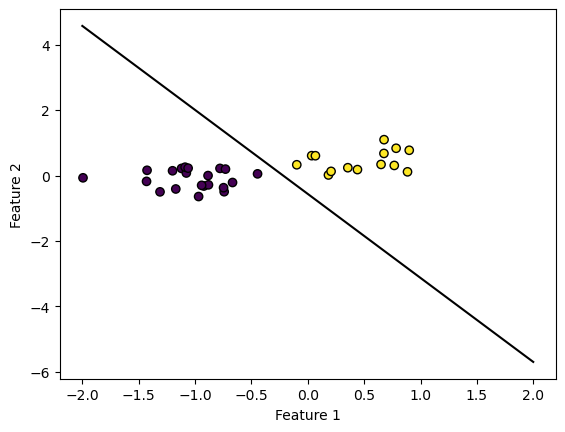

In [9]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# 获取决策边界
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2, 2)
yy = a * xx - (model.intercept_[0]) / w[1]
# 绘制决策边界
plt.plot(xx, yy, 'k-')

在上述所有用过算法中使用的例子都是可以线性分离的情况，这种不允许数据进入间隔内侧的情况称为硬间隔；<br>
但一般来说，数据并不是完全可以线性分离的，所以要允许一部分数据进入间隔内侧，这种情况叫作软间隔

基于线性支持向量机的学习结果，我们可以将训练数据分为以下 3 种
1. 与决策边界之间的距离比间隔还要远的数据：间隔外侧的数据。
2. 与决策边界之间的距离和间隔相同的数据：间隔上的数据。
3. 与决策边界之间的距离比间隔近，或者误分类的数据：间隔内侧的数据。<br><br>
我们将间隔上的数据和间隔内侧的数据特殊对待，称为支持向量

### 2. 5支持向量机(核方法)

核方法的一个常见解释是“将数据移动到另一个特征空间，然后进行线性回归”<br>
虽然构建线性分离的高维空间非常困难，但通过一个叫作核函数的函数，核方法就可以使用在高维空间中学习到的决策边界，而无须构建具体的线性分离的高维空间。

![title](./image/kernel.jpg)

下面是一段使用核方法的支持向量机学习呈圆形分布的数据的决策边界的代码<br>
代码中没有明确指定使用哪个核方法，代码默认使用RBF（Radial Basis Function，径向基函数）核方法

In [10]:
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# 生成一个包含300个样本、2个特征的高斯量化数据集，其中指定了两个类别和两个特征
X, y = make_gaussian_quantiles(n_features=2, n_classes=2, n_samples=300)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.9444444444444444

Text(0, 0.5, 'Feature 2')

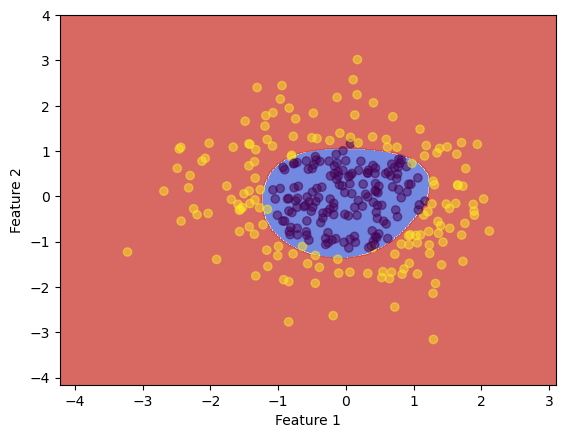

In [11]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

### 2. 6朴素贝叶斯

朴素贝叶斯是一个基于概率进行预测的算法，在实践中被用于分类问题。<br>
具体来说，就是计算数据为某个标签的概率，并将其分类为概率值最大的标签。<br>
朴素贝叶斯主要用于文本分类和垃圾邮件判定等自然语言处理中的分类问题。

- 引例

![title](./image/precedent.jpg)

在“电影”类别的数据中出现“感动”这个词的概率是 2/3 ≈ 67%，在“宇宙”类别的数据中则是 1/3 ≈ 33%，可见这个词更容易出现在“电影”类别的数据中。另外，在出现“感动”这个词的数据中，类别为“电影”的概率是 2/3 ≈ 67%，为“宇宙”的概率是 1/3 ≈ 33%。<br>
朴素贝叶斯不仅使用了单词在文本中出现的比例，还使用了每个单词的条件概率，通过文本中单词的信息提高了计算精度。

- 朴素贝叶斯概率计算
    1. 每个标签出现的概率。
    2. 在各标签下，每个单词出现的条件概率。

在应用朴素贝叶斯时，还需要将输入数据转换为由特征值构成的向量。<br>
我们先在预处理阶段将文本转换为由特征值构成的向量，然后使用朴素贝叶斯进行训练。

- 预处理
    1. 在预处理阶段，我们将文本转换为 BoW（Bag of Words，词袋）的形式，形成由特征值构成的向量和标签的组合，从现有的训练数据的文本中只提取出名词，忽略名词在文本中的顺序，把它们作为集合处理
    2. 将训练数据和类别转换为易于处理的数据形式。当所有单词的集合包含训练数据的单词时，将该单词列的值设为1，否则设为0。另外，当类别为“电影”时，将类别的值替换为1；当
类别为“宇宙”时，将类别的值替换为0
    3. 通过以上处理，我们可以将以自然语言书写的文本转换为表示单词出现的特征值和标签的组合，这种文本表示方式称为 BoW，下面采用同样的做法处理验证数据

![title](./image/collection.jpg)
![title](./image/vector.jpg)
![title](./image/verify.jpg)

In [12]:
from sklearn.naive_bayes import MultinomialNB
# 生成数据
X_train = [[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
           [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
           [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1]]
y_train = [1, 1, 1, 0, 0, 0]
model = MultinomialNB()
model.fit(X_train, y_train)
# 训练
model.predict([[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]])
# 评估

array([1])

### 2. 7随机森林

随机森林的目标是利用多个决策树模型，获得比单个决策树更高的预测精度。单个决策树的性能并不一定很高，但是多个决策树汇总起来，一定能创建出泛化能力更强的模型。

随机森林需要采用不同的学习方法创建决策树

- 决策树<br>
决策树是通过将训练数据按条件分支进行划分来解决分类问题的方法，在分割时利用了表示数据杂乱程度（或者不均衡程度）的不纯度的数值。<br>决策树为了使表示数据杂乱程度的不纯度变小，
对数据进行分割。<br>当分割出来的组中存在很多相同的标签时，不纯度会变小；反之，当分割出来的组中存在很多不同的标签时，不纯度会变大。

此处采用基尼系数来表示不纯度<br>
基尼系数=1-SUM(Pi^2)

![title](divide.jpg)

由此可见决策树的学习是通过反复分割空间进行的
1. 计算某个区域的所有特征值和候选分割的不纯度。
2. 以分割时不纯度减小最多的分割方式分割区域。
3. 对于分割后的区域，重复步骤 1 和步骤 2。

- 随机森林<br>
假设有3棵独立的决策树，每棵的正确率为0.6。此时，对每棵决策树的结果进行多数表决，并将表决结果作为预测结果，即可提高正确率。<br>
在这种情况下，预测不正确有两种情况：一种是所有的决策树都预测不正确（概率为 (1 − 0.6)^3 =0.064 ）；<br>
另一种是 3 棵决策树中有 2 棵预测不正确（概率为 3 × (1 − 0.6)^2 × 0.6 =0.288 ）；<br>
所以正确的概率是1 − 0.064 − 0.288 = 0.648。

随机森林首先采用 Bootstrap 方法，根据训练数据生成多个不同内容的训练数据。<br>
所谓 Bootstrap 方法，即通过对单个训练数据进行多次随机的抽样放回，“虚增”训练数据，这样就可以为每棵决策树输入不同的训练数据。<br>
然后在根据使用 Bootstrap 方法创建的训练数据训练决策树时，只随机选取部分特征值来训练决策树。<br>
通过“Bootstrap 方法”和“随机选取特征值”这两种方法，就可以训练出具有多样性的决策树

下面是一段使用随机森林基于3种葡萄酒的各种测量值数据，对葡萄酒分类的模型

In [13]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# 读取数据
data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(
data.data, data.target, test_size=0.3)
model = RandomForestClassifier()
model.fit(X_train, y_train)
# 训练
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)
# 评估

0.9629629629629629

### 2. 8神经网络

神经网络在输入数据和输出结果之间插入了叫作中间层的层，能够学习复杂的决策边界。

此处我们对一个叫作 MNIST 的手写数字数据集进行分类。MNIST 包含从 0 到 9 的 10 个手写数字的图片，我们对图片进行分类。<br>
数据集的图片是8*8的灰度图像<br>
![title](./image/mnist.jpg)

- 输入层<br>
  输入层表示输入图像（64 维向量）本身。如果将各个点的像素值存储在长度为 64 的一维数组的元素中，则可以将其视为 64 维数据来处理。
- 中间层<br>
  使用 Sigmoid 等非线性函数计算输入层传来的数据。中间层的维度是超参数。使维度变大可以学习更加复杂的边界。
- 输出层<br>
  输出的是手写图像分别为0~9这十个数的概率

- 简单感知机<br>
  简单感知机是将非线性函数应用于对特征值加权后的结果并进行识别的模型。<br>
  例如一个二维的特征值(x1,x2)，使用非线性函数f计算概率y = f(w0+w1x1+w2x2)，我们将其中的特征值的系数 w1 和 w2 称为权重，将常数项 w0 称为偏置；它们都是学习参数；f函数称为激活函数（常用的激活函数有 Sigmoid 函数）

- 神经网络<br>
  对一些非线性的决策边界，简单感知机不能进行正确分类，而神经网络可通过叠加简单感知机，表示复杂的决策边界；

![title](./image/nerve.jpg)

下面读取MNIST数据集，将其分割成训练数据和验证数据，使用训练数据训练模型，使用验证数据评估正确率

In [14]:
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# 读取数据
data = load_digits()
X = data.images.reshape(len(data.images), -1)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = model = MLPClassifier(hidden_layer_sizes=(16, ))
model.fit(X_train, y_train)
# 训练
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)
# 评估

/home/lay/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9407407407407408

### 2. 9KNN

在对未知数据进行分类时，KNN 将计算未知数据与训练数据的距离，通过多数表决找到最邻近的k个点，然后进行分类。

KNN 是一种在训练时机械地记住所有数据的简单算法。该算法使用训练数据对未知输入数据进行分类时的步骤如下。
1. 计算输入数据与训练数据之间的距离。
2. 得到距离输入数据最近的 k 个训练数据。
3. 对训练数据的标签进行多数表决，将结果作为分类结果。

下面是一段使用KNN对曲线分布的样本数据进行学习的代码

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# 生成数据
X, y = make_moons(noise=0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# 最近邻点k的数量采用默认值5
model = KNeighborsClassifier()
model.fit(X_train, y_train)
# 训练
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)
# 评估

0.8333333333333334

Text(0, 0.5, 'Feature 2')

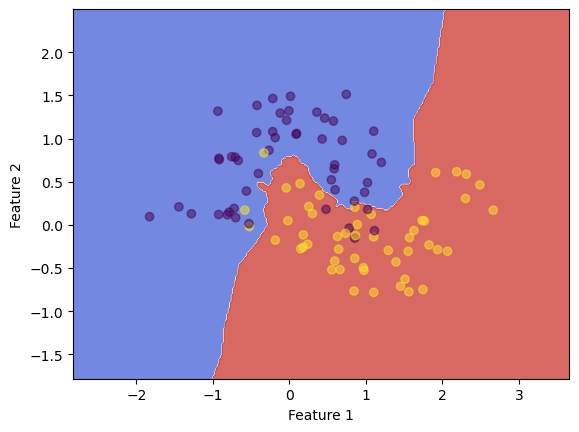

In [16]:
# 绘制决策边界
h = .02  # 步长
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

在KNN中，k值是一个超参数。改变k值，决策边界会发生变化<br>
![title](./image/diffK.jpg)

当数据量较小或维度较小时，KNN 的效果很好，但是当数据量较大或维度较大时，由于要处理大量的训练数据，所以分类将变慢。<br>
这是由于在对未知数据进行分类时，KNN 需要在大量的训练数据上进行近邻搜索以找到最近的点。